<a href="https://colab.research.google.com/github/Seife1/SunEnergy_Optimization_Project/blob/main/EDA_for_Benin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sun Energy Optimization: Exploratory Data Analysis(EDA)**

## **Dataset Overview**

### **Solar Radiation Measurement Data for Benin**
The data is extracted and aggregated from https://energydata.info/dataset/?q=Solar+Radiation+Measurement&vocab_regions=AFR. Each row in the data contains the values for **solar radiation**, **air temperature**, **relative humidity**, **barometric pressure**, **precipitation**, **wind speed**, and **wind direction**, **cleaned** and soiled radiance sensor (**soiling measurement**) and **cleaning events**.


### **Imports and Reading Data**

In [118]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
benin_df = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/data/benin-malanville.csv')

The dataset above comprises solar farm data from **Benin**. Our next focus will be on understanding, exploring, and analyzing this dataset.

### **Data Understanding**

In [121]:
# Display the first 5 rows of data from BENIN
benin_df.head(10)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
5  2021-08-09 00:06 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.8  0.0     0.4   
6  2021-08-09 00:07 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.0     0.0   
7  2021-08-09 00:08 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.7     1.3   
8  2021-08-09 00:09 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.4     1.1   
9  2021-08-09 00:10 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.5     1.1   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   
5      0.1  119.1      0.0  997         0            0.0   26.4   26.3   
6      0.0    0.0      0.0  997         0            0.0   26.5   26.3   
7      0.6  126.8      2.8  997         0            0.0   26.5   26.3   
8      0.5  124.9      5.5  997         0            0.0   26.5   26.4   
9      0.5  114.2      5.1  997         0            0.0   26.5   26.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

In [122]:
# Display the last 5 rows of data from BENIN
benin_df.tail()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.5  119.3      4.1  996         0            0.0   23.5   22.9   
525596      0.4  115.2      2.3  996         0            0.0   23.5   22.9   
525597      0.5  129.8      3.4  996         0            0.0   23.5   22.9   
525598      0.5  124.4      4.3  996         0            0.0   23.5   22.9   
525599      0.3  124.1      5.9  996         0            0.0   23.5   22.9   

        Comments  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN

In [123]:
(benin_df[["Cleaning"]] > 0).sum()

Cleaning    485
dtype: int64


* Next :- Determine the number of records and features of the dataset

In [124]:
# Shape or size of the datasets
print(f'Benin Dataset Shape: {benin_df.shape}')

Benin Dataset Shape: (525600, 19)


In [125]:
# Gain information from the datatasets
benin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

### Data Insights for **Benin data**
* All columns are not having any null entries except *Comments*
* From 18 not null columns 17 columns are numerical the left is categorical data

In [126]:
# We can also check by
print("Benin Datasets")
benin_df.dtypes.value_counts()

Benin Datasets


float64    16
int64       2
object      1
Name: count, dtype: int64

In [127]:
# Statistics of benin datasets
benin_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

### **Data Preparation**

Visualizing missing data patterns

<Axes: >

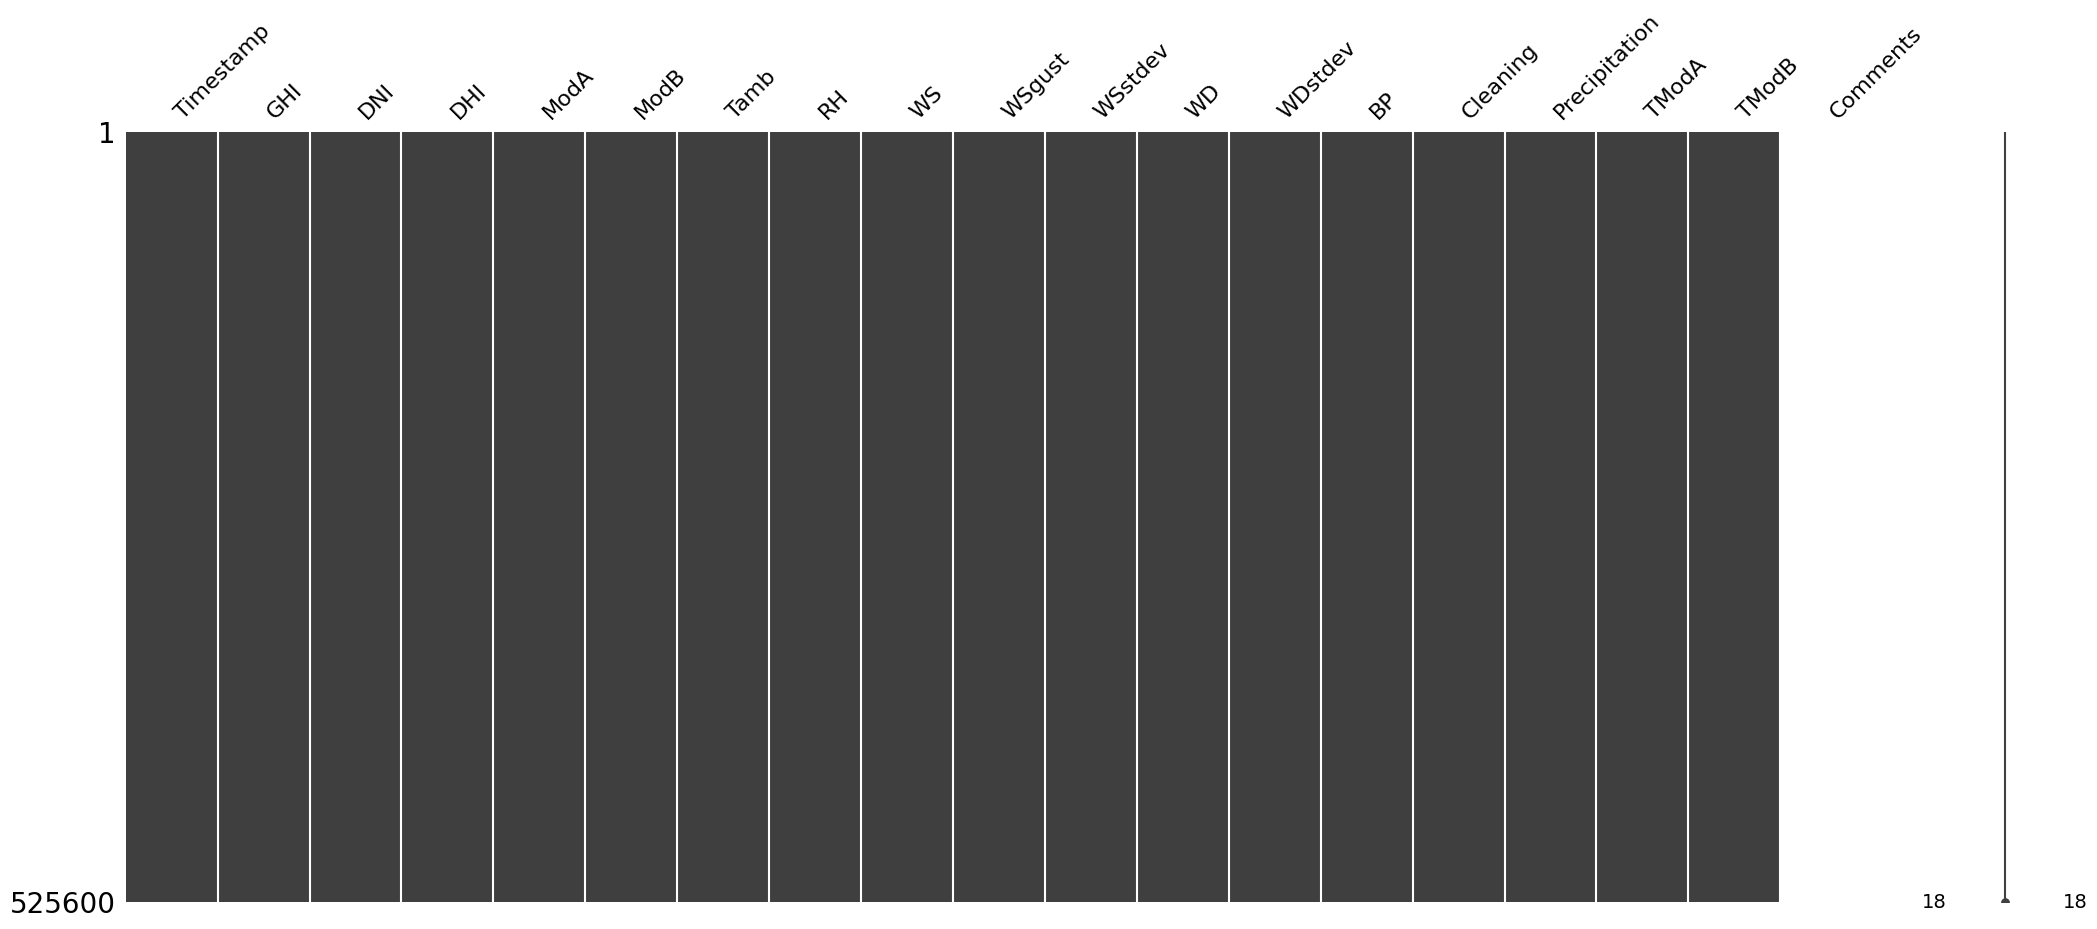

In [128]:
import missingno as msno
msno.matrix(benin_df)

As you can see from the vissualizer all datasets are not null except the last column(**comments**)since it's white throughout the column, So I would like to drop it for all dataset for now

In [129]:
# Here is numericaly for the datasets of benin,
benin_df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [130]:
# To drop the comments column for all the datasets
benin_df.drop('Comments', axis=1, inplace=True)

Data Redunduncy

In [131]:
duplicated_columns = benin_df.columns[benin_df.columns.duplicated()]
if len(duplicated_columns) > 0:
    print("Duplicated columns:", duplicated_columns)
else:
    print("No duplicated columns found for benin datasets.")

No duplicated columns found for benin datasets.


In [132]:
duplicated_rows = benin_df[benin_df.duplicated()]
if not duplicated_rows.empty:
    print("Duplicated rows:")
    print(duplicated_rows)
else:
    print("No duplicated rows found for Benin datasets.")

No duplicated rows found for Benin datasets.


### **Feature Understanding**

In [133]:
# Exploring Unique values
benin_df.nunique()

Timestamp        525600
GHI                8609
DNI                8905
DHI                6995
ModA              10755
ModB               8461
Tamb                329
RH                  980
WS                  164
WSgust               92
WSstdev              42
WD                 3601
WDstdev             679
BP                   19
Cleaning              2
Precipitation        26
TModA               712
TModB               642
dtype: int64

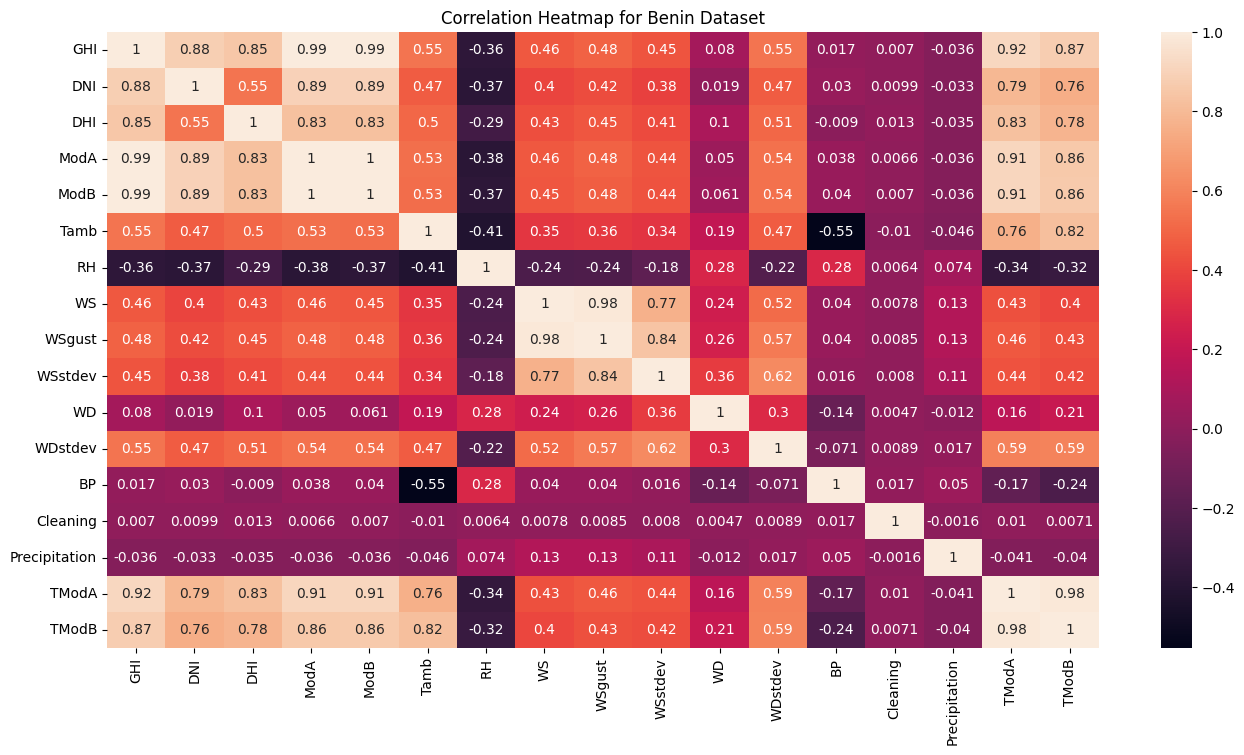

In [134]:
# Visuallizing correlation with heatmaps

# Select only numeric columns for correlation calculation
numeric_benin_df = benin_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(16, 8))
sns.heatmap(numeric_benin_df.corr(), annot=True)
plt.title('Correlation Heatmap for Benin Dataset')
plt.show()

The correlation coefficient is a value between -1 and 1 which indicates the strength and direction of the relationship between two feature from our columns. So A value close to 1(white) indicates close relationship, a value close to -1 indicates a strong negative relationship, a value close to zero represent no relationship.

**Identifying Outliers with Box Plots**

Box plots are a great way to identify outliers in your data. An outlier is a value that is significantly different from the other values.

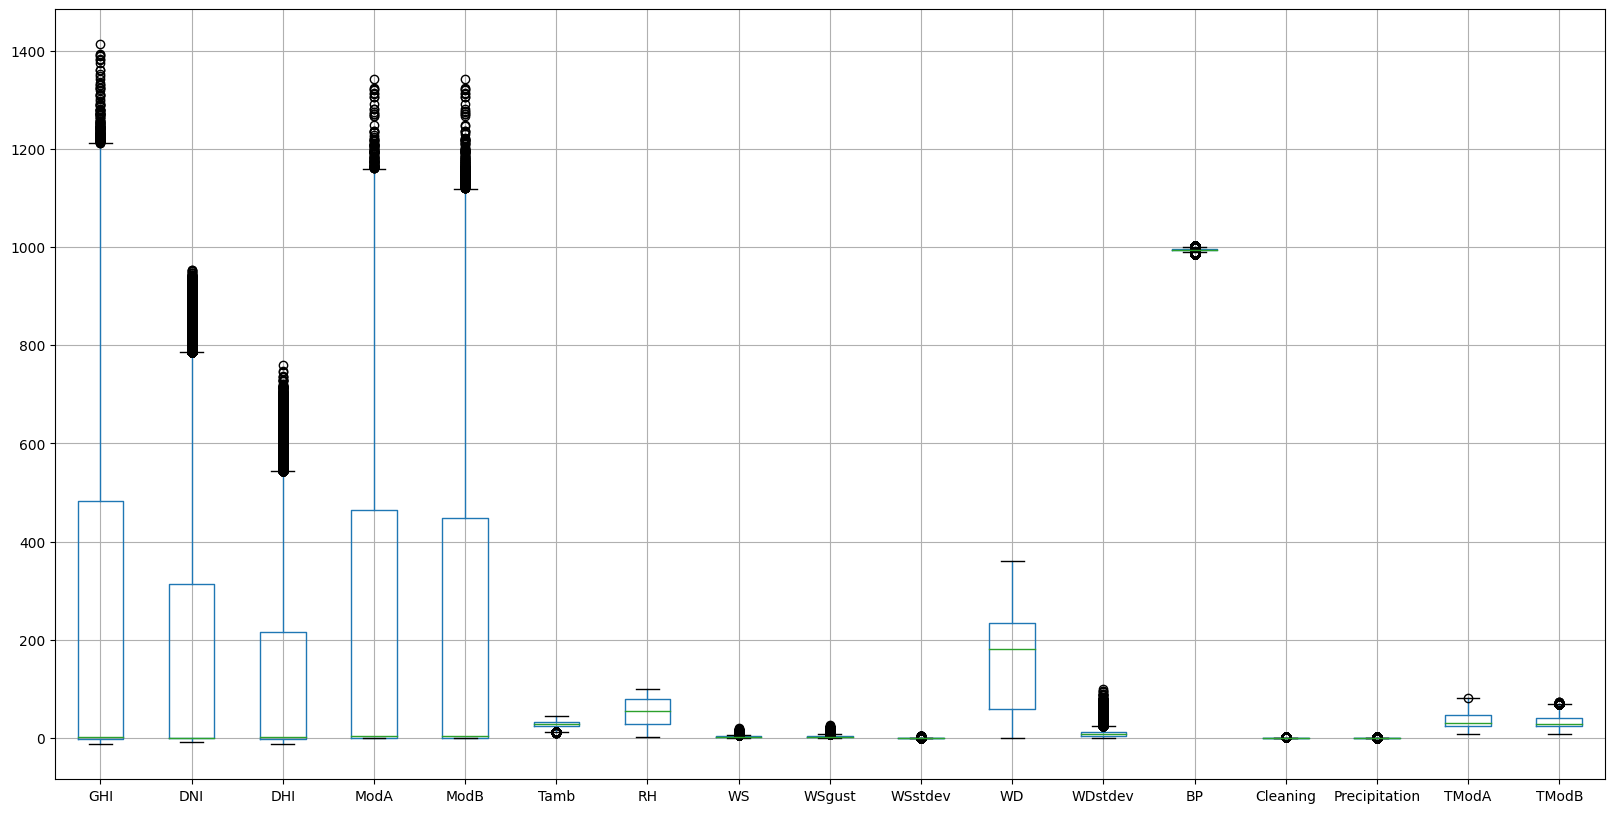

In [135]:
benin_df.boxplot(figsize=(20, 10))
plt.show()

The box in each box plot represents the interquartile range (the range between the 25th and 75th percentiles), the line inside the box represents the median, and the dots outside the box represent outliers.

In [155]:
# Replacing outliers with the median is generally a good approach because it is less sensitive to extreme values than the mean.
# This helps to preserve the overall distribution of the data while still addressing the issue of outliers.

# Iterate over the columns of the DataFrame & Calculate the IQR (Interquartile Range)
for column in benin_df.columns:
  if column == 'Timestamp':
    continue
  Q1 = benin_df[column].quantile(0.25)
  Q3 = benin_df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define the outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Calculate the median of the column column
  median_ghi = benin_df[column].median()

  # Replace outliers with the median
  benin_df[column] = np.where((benin_df[column] < lower_bound) | (benin_df[column] > upper_bound),
                            median_ghi, benin_df[column])


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [156]:
# Try the rest by calculating the Z-Score to flag data points that are significantly different from the mean

from scipy.stats import zscore

# Calculate Z-scores for the Benin dataset (excluding the 'Timestamp' column)
z_score_benin = zscore(benin_df.drop('Timestamp', axis=1))

# Identify outliers where z-score is greater than the threshold
threshold = 3
outliers_benin = (np.abs(z_score_benin) > threshold).any(axis=1)
print(f"Number of outliers in Benin dataset: {outliers_benin.sum()}")

# Replace outliers with the mean value of the respective features, excluding the outliers
for column in benin_df.columns:
    if column == 'Timestamp':
        continue
    non_outliers = ~outliers_benin
    column_mean = benin_df.loc[non_outliers, column].mean()
    benin_df.loc[outliers_benin, column] = column_mean

# Recheck if there are any remaining outliers
z_score_benin_after = zscore(benin_df.drop('Timestamp', axis=1))
outliers_benin_after = (np.abs(z_score_benin_after) > threshold).any(axis=1)
print(f"Number of outliers in Benin dataset after replacement: {outliers_benin_after.sum()}")

Number of outliers in Benin dataset: 9
Number of outliers in Benin dataset after replacement: 0


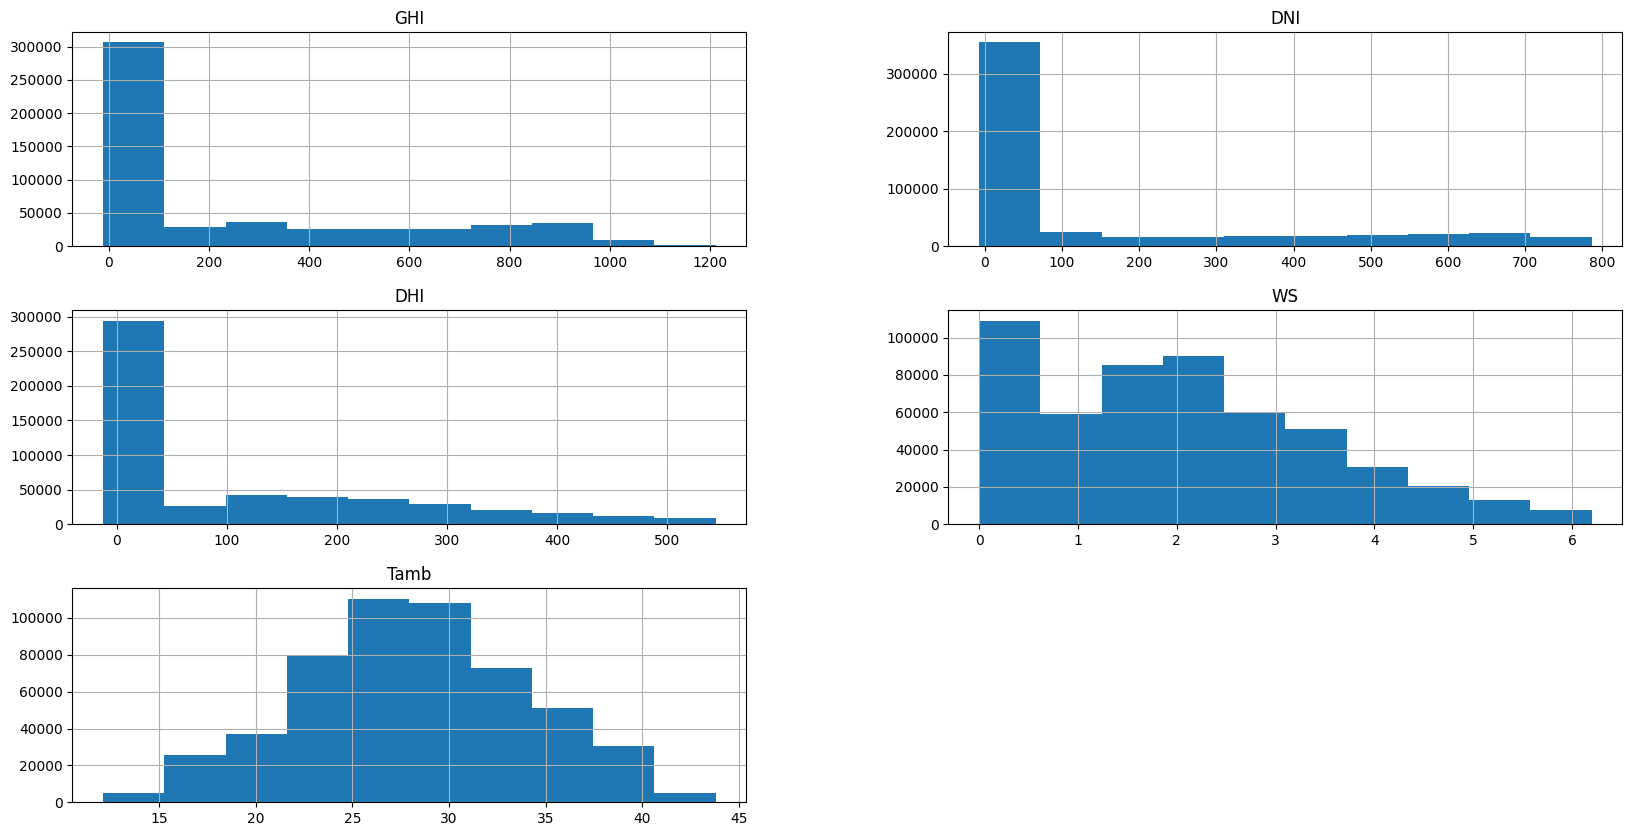

In [138]:
# Histogram
benin_df[["GHI", "DNI", "DHI", "WS", "Tamb"]].hist(figsize=(20, 10))
plt.show()

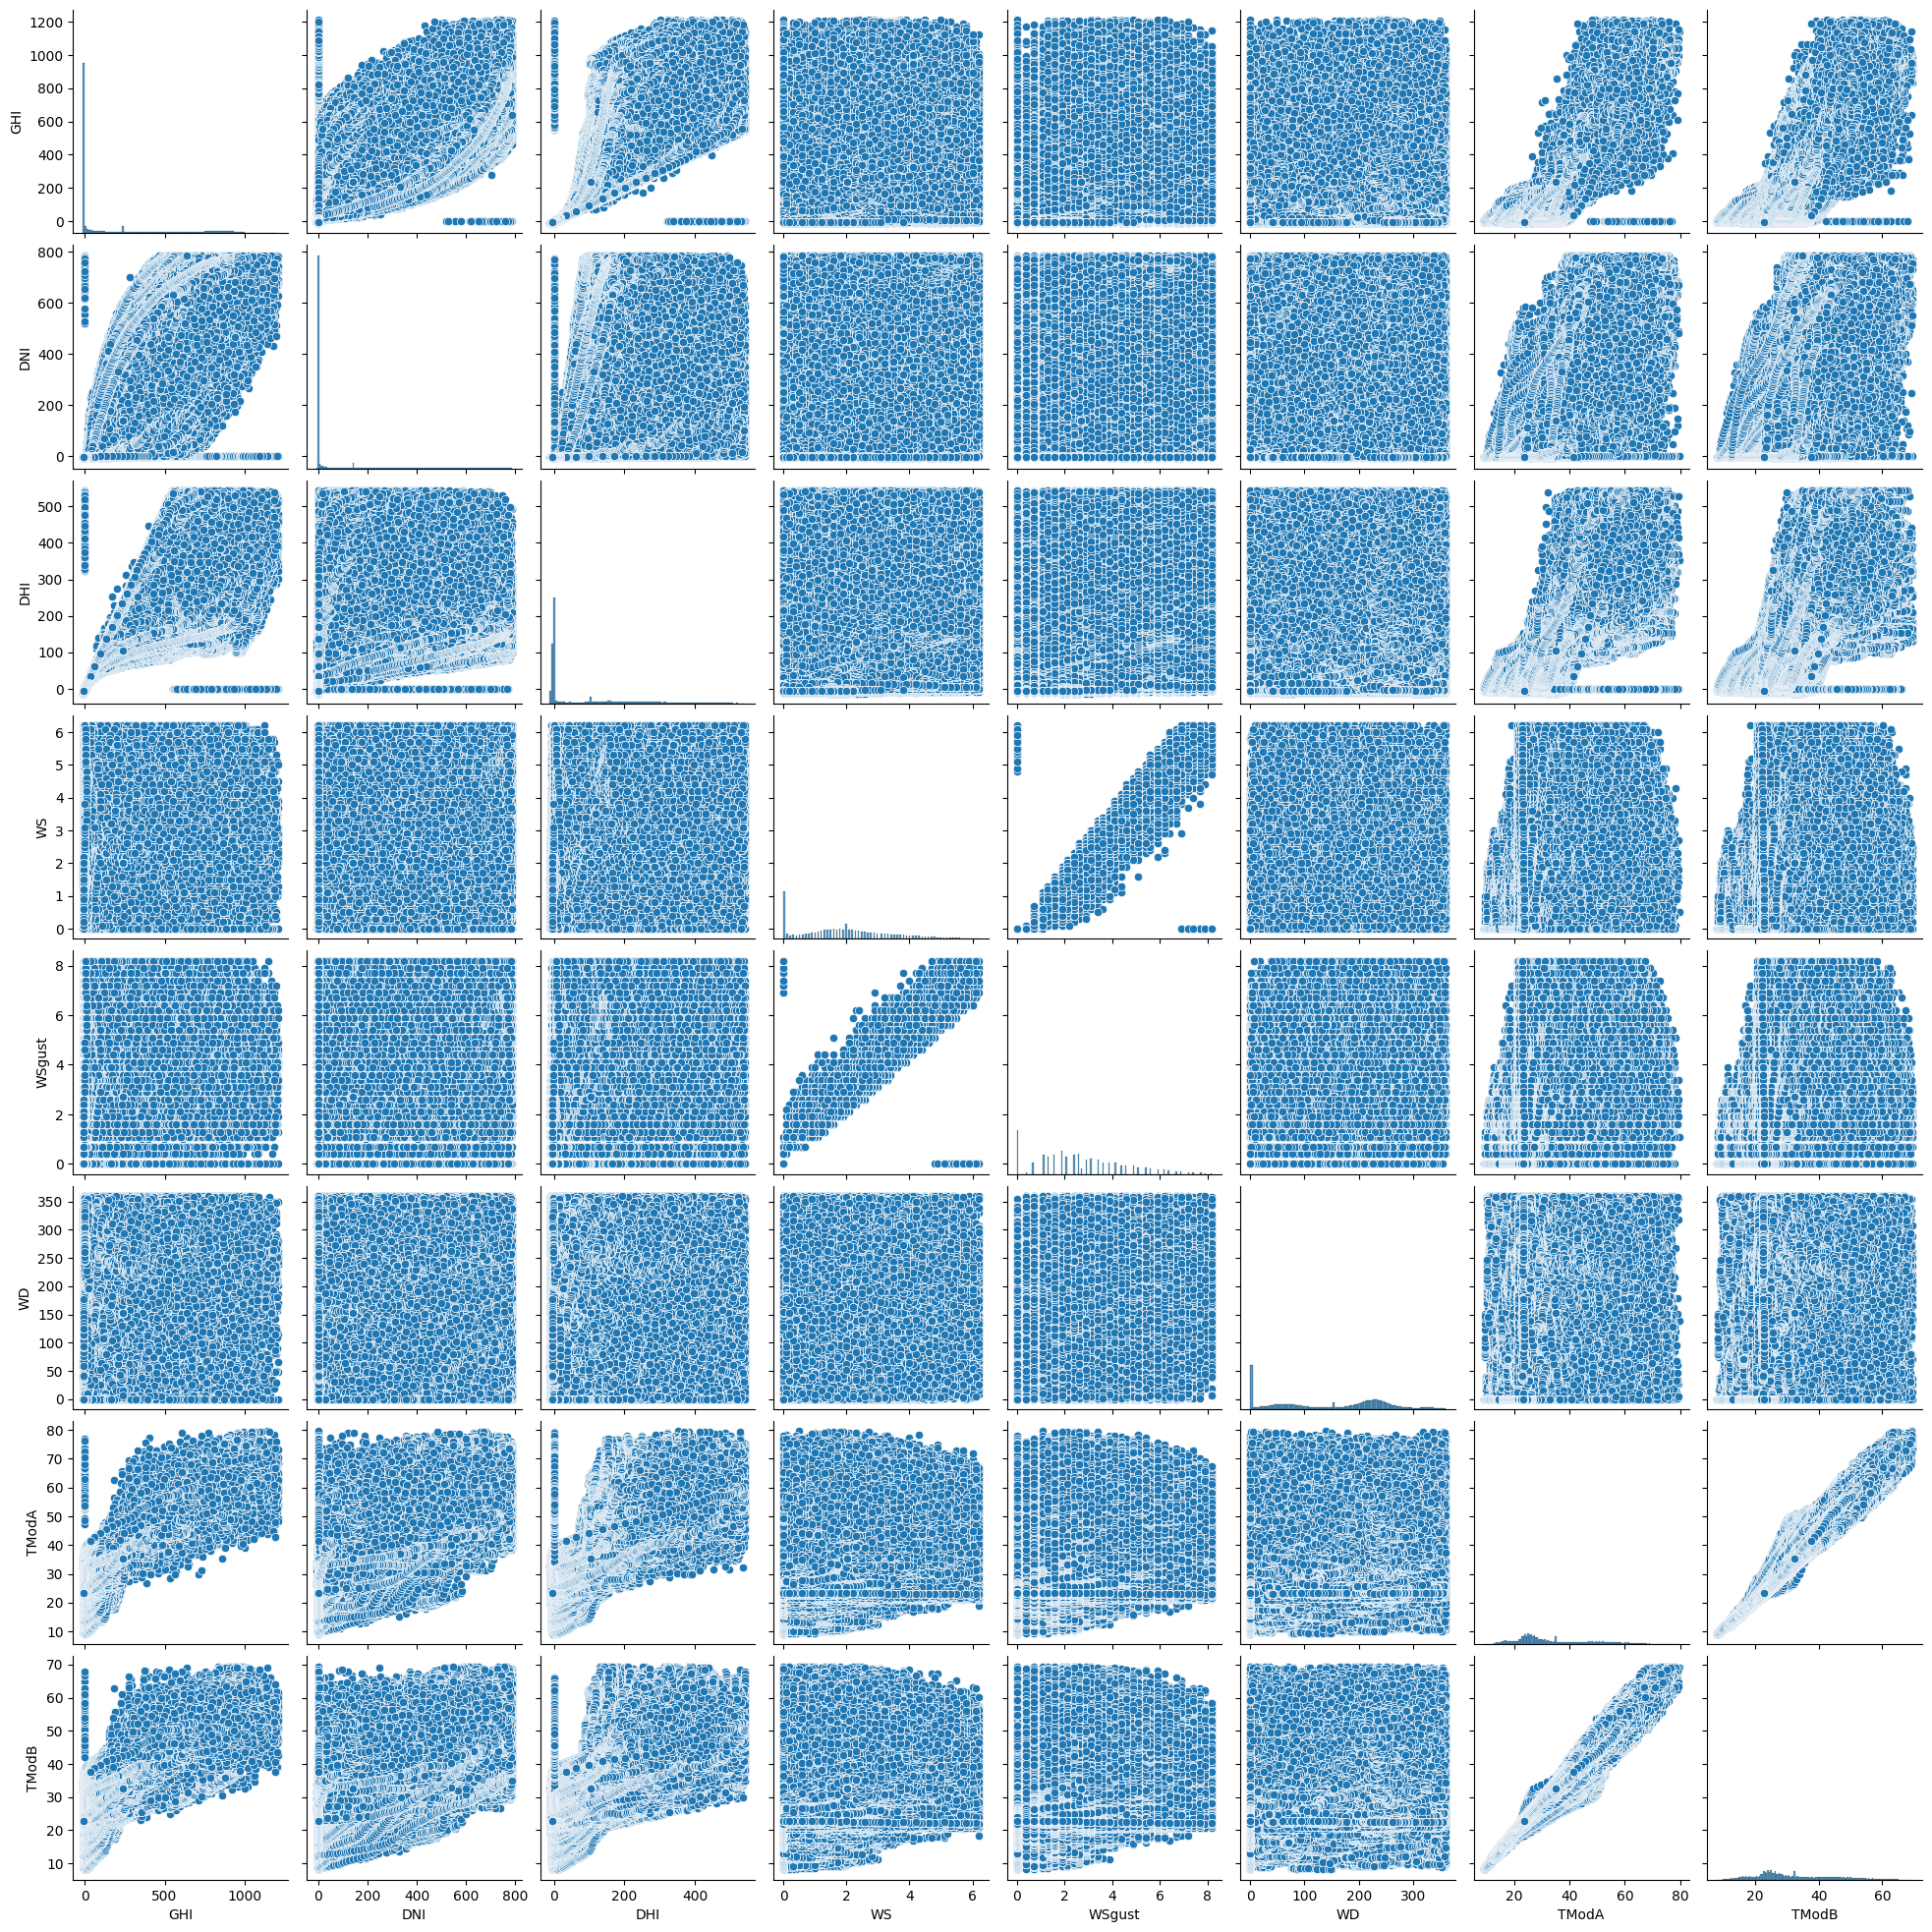

In [139]:
# Subset the data to include wind conditions and solar irradiance
subset_df = benin_df[["GHI", "DNI", "DHI", "WS", "WSgust", "WD", "TModA", "TModB"]]

# Generate a scatter plot matrix
sns.pairplot(subset_df)
plt.show()

In [157]:
# Display the last 5 rows of data from BENIN
benin_df.tail()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.5  119.3      4.1  996.0       0.0            0.0   23.5   22.9   
525596      0.4  115.2      2.3  996.0       0.0            0.0   23.5   22.9   
525597      0.5  129.8      3.4  996.0       0.0            0.0   23.5   22.9   
525598      0.5  124.4      4.3  996.0       0.0            0.0   23.5   22.9   
525599      0.3  124.1      5.9  996.0       0.0            0.0   23.5   22.9   

        Comments  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN

In [141]:
benin_df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

 **Time Series of Solar Irradiance and Ambient Temperature**

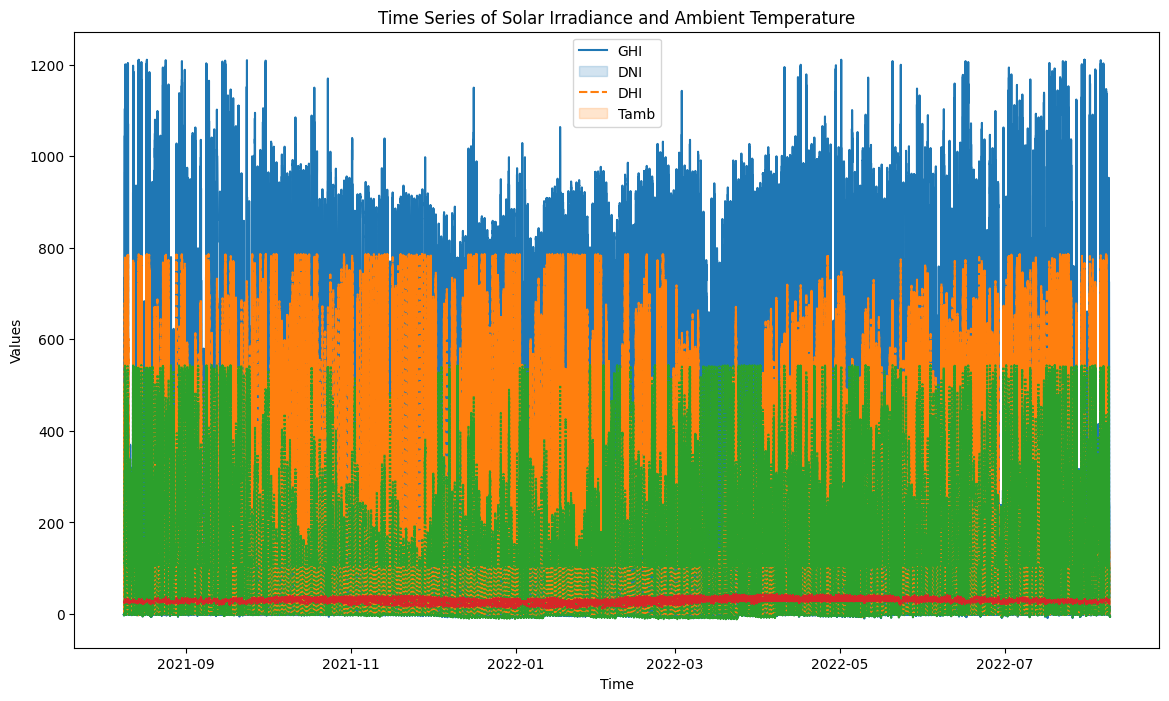

In [142]:
# Ensure 'Timestamp' is in datetime format
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])

# Set 'Timestamp' as the index
benin_df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=benin_df[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Time Series of Solar Irradiance and Ambient Temperature')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['GHI', 'DNI', 'DHI', 'Tamb'])
plt.show()

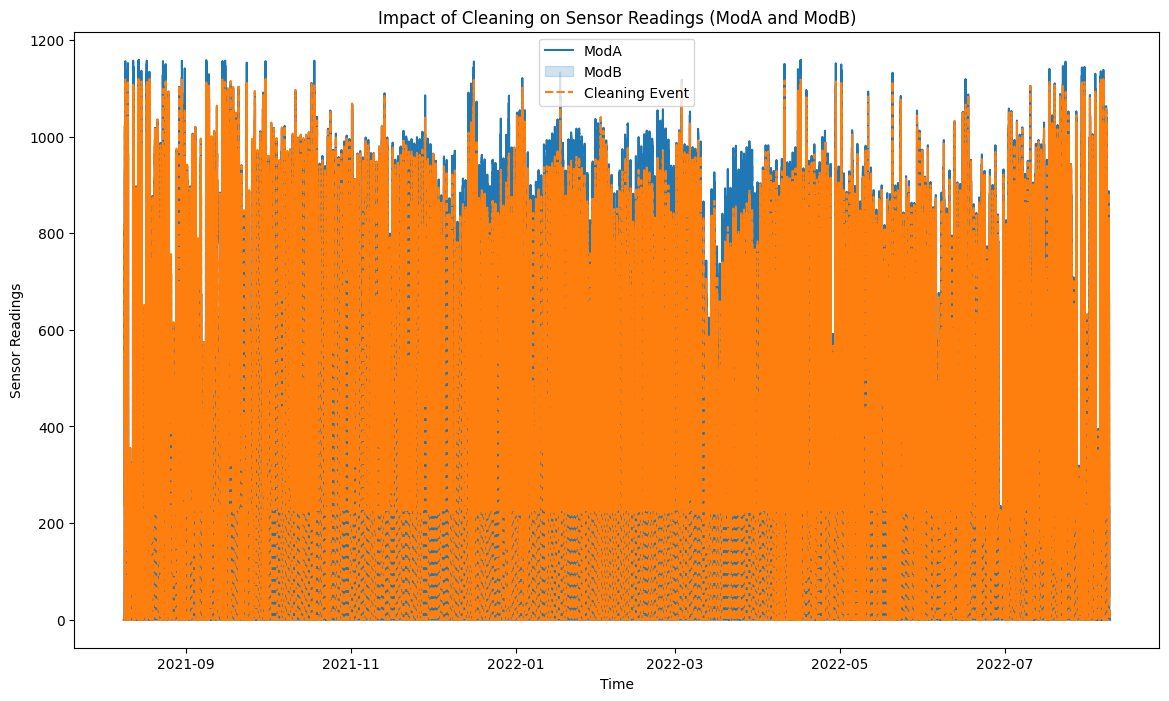

In [143]:
# Plot ModA and ModB over time with cleaning events highlighted
plt.figure(figsize=(14, 8))

# Plot ModA and ModB
sns.lineplot(data=benin_df[['ModA', 'ModB']], palette='tab10')

# Highlight cleaning events
cleaning_events = benin_df[benin_df['Cleaning'] == 1].index
for event in cleaning_events:
    plt.axvline(x=event, color='red', linestyle='--', alpha=0.5)

plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB)')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend(['ModA', 'ModB', 'Cleaning Event'])
plt.show()

**Wind Direction Distribution(Polar Histogram)**

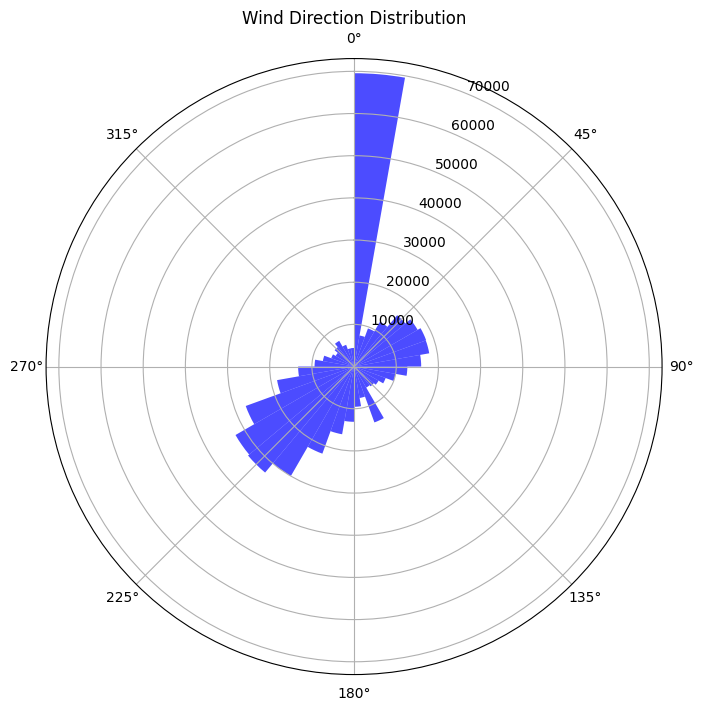

In [144]:
# Convert wind direction from degrees to radians
benin_df['WD_rad'] = np.deg2rad(benin_df['WD'])

# Create a polar histogram for wind direction
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(benin_df['WD_rad'], bins=36, color='blue', alpha=0.7)
ax.set_theta_zero_location('N')  # Set the start to North
ax.set_theta_direction(-1)  # Set the direction clockwise

plt.title('Wind Direction Distribution')
plt.show()

**Wind Speed vs. Wind Direction(Polar Scatter Plot)**

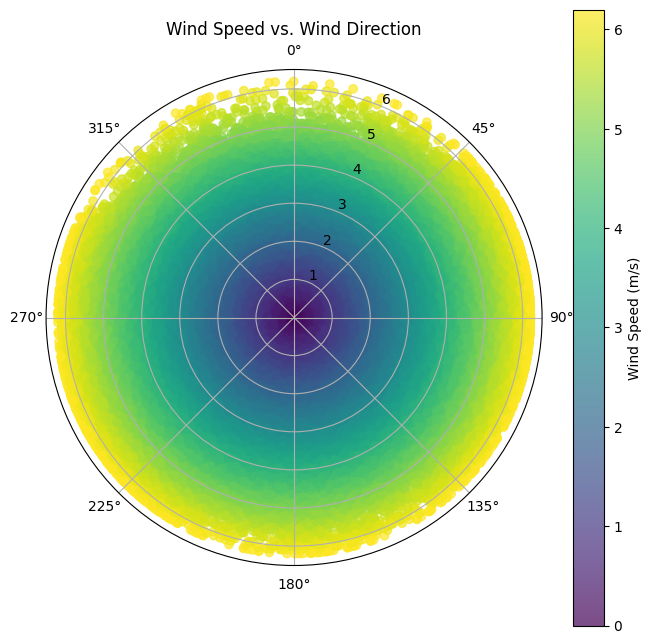

In [145]:
# Create a polar scatter plot for wind speed and direction
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
sc = ax.scatter(benin_df['WD_rad'], benin_df['WS'], c=benin_df['WS'], cmap='viridis', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Add color bar for wind speed
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Wind Speed (m/s)')

plt.title('Wind Speed vs. Wind Direction')
plt.show()

**Wind Direction Variability**

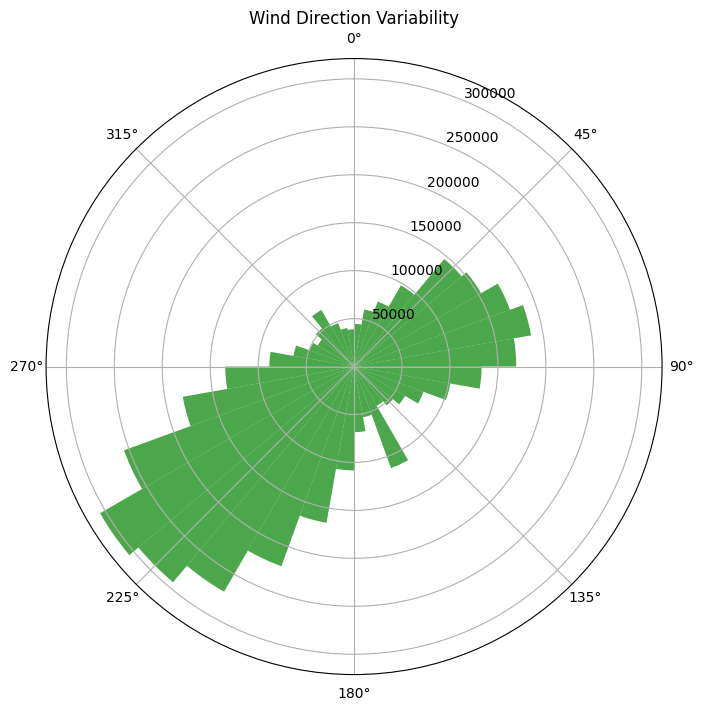

In [146]:
# Convert the standard deviation of wind direction to radians
benin_df['WDstdev_rad'] = np.deg2rad(benin_df['WDstdev'])

# Create a polar plot for wind direction variability
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(benin_df['WD_rad'], weights=benin_df['WDstdev'], bins=36, color='green', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Wind Direction Variability')
plt.show()

**The Influence of RH on Temperature and Solar Radiation**

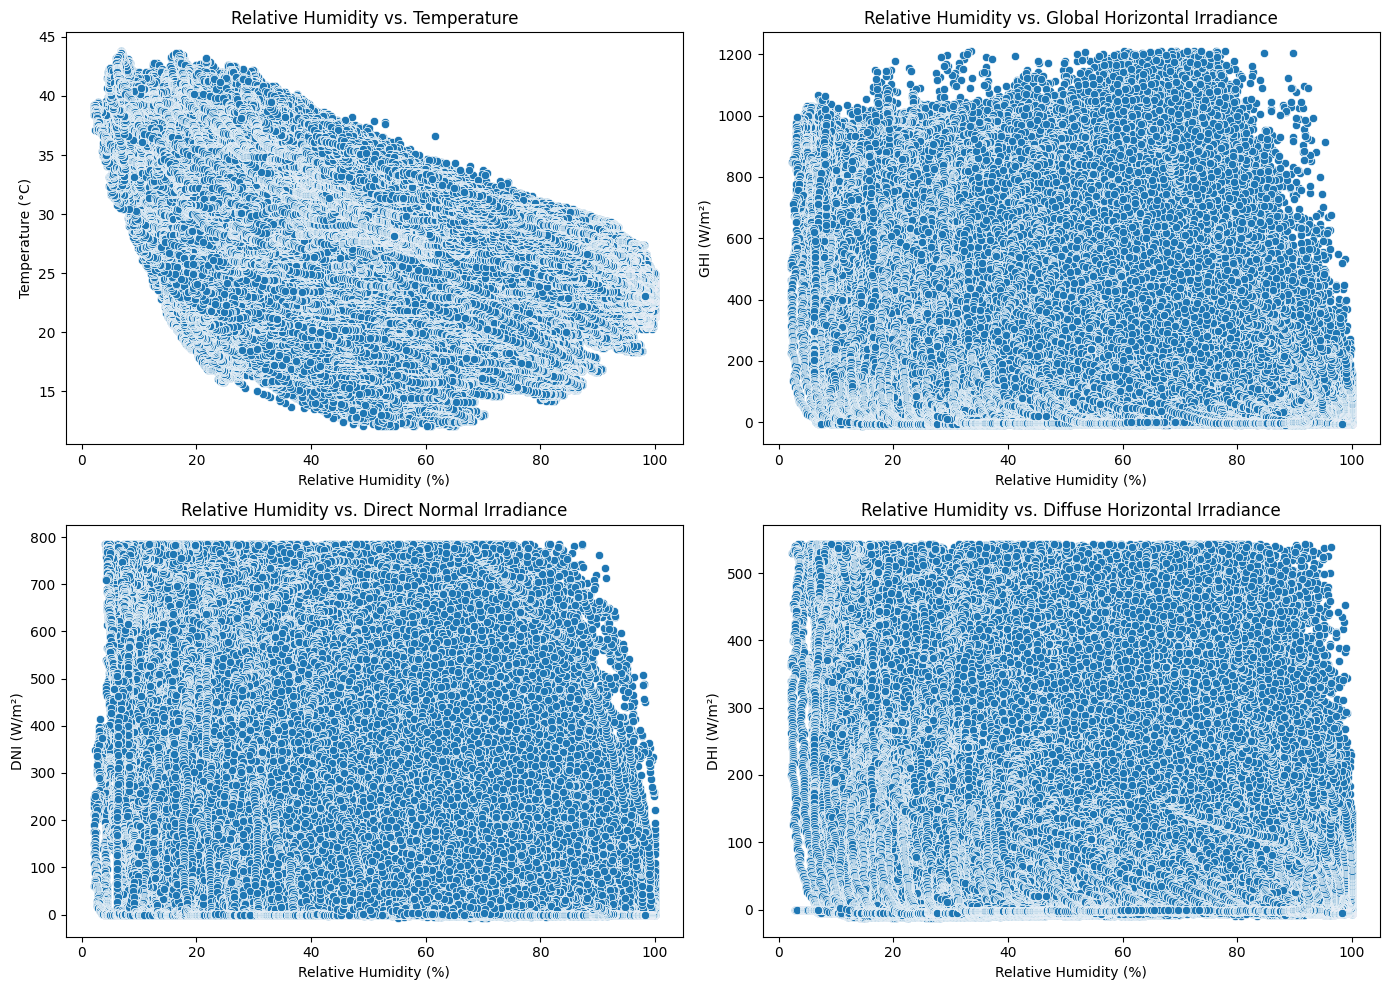

In [147]:
# Set up the figure and axes for multiple scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for RH vs. Temperature (Tamb)
sns.scatterplot(x='RH', y='Tamb', data=benin_df, ax=axs[0, 0])
axs[0, 0].set_title('Relative Humidity vs. Temperature')
axs[0, 0].set_xlabel('Relative Humidity (%)')
axs[0, 0].set_ylabel('Temperature (°C)')

# Scatter plot for RH vs. Global Horizontal Irradiance (GHI)
sns.scatterplot(x='RH', y='GHI', data=benin_df, ax=axs[0, 1])
axs[0, 1].set_title('Relative Humidity vs. Global Horizontal Irradiance')
axs[0, 1].set_xlabel('Relative Humidity (%)')
axs[0, 1].set_ylabel('GHI (W/m²)')

# Scatter plot for RH vs. Direct Normal Irradiance (DNI)
sns.scatterplot(x='RH', y='DNI', data=benin_df, ax=axs[1, 0])
axs[1, 0].set_title('Relative Humidity vs. Direct Normal Irradiance')
axs[1, 0].set_xlabel('Relative Humidity (%)')
axs[1, 0].set_ylabel('DNI (W/m²)')

# Scatter plot for RH vs. Diffuse Horizontal Irradiance (DHI)
sns.scatterplot(x='RH', y='DHI', data=benin_df, ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity vs. Diffuse Horizontal Irradiance')
axs[1, 1].set_xlabel('Relative Humidity (%)')
axs[1, 1].set_ylabel('DHI (W/m²)')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

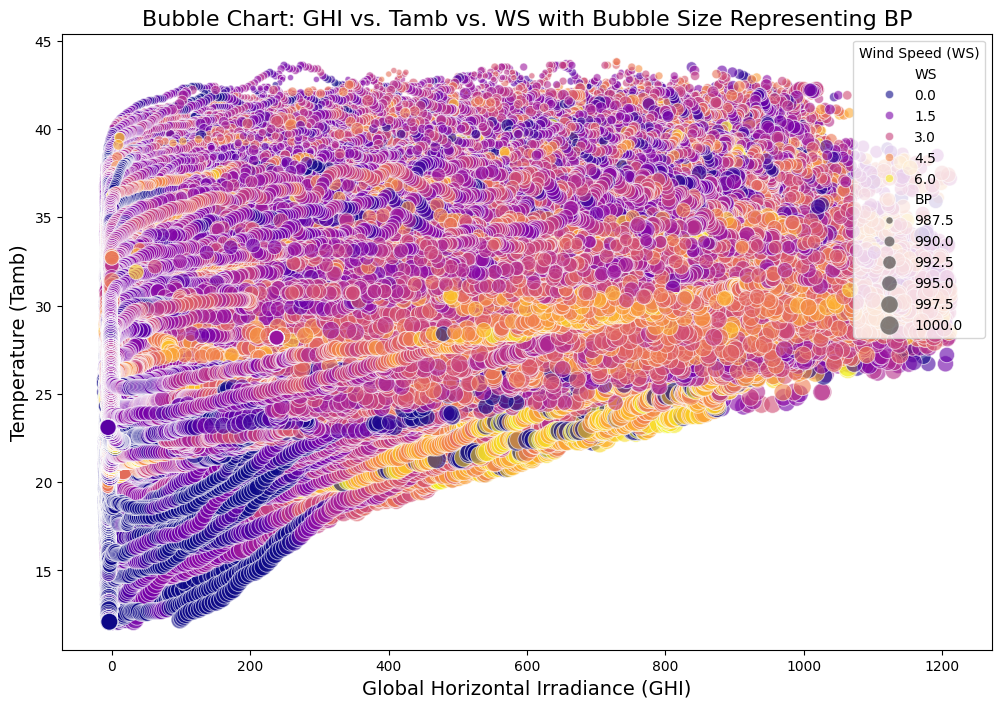

In [148]:
# Create a bubble chart
plt.figure(figsize=(12, 8))

# Scatter plot with bubble size representing BP
bubble_chart = sns.scatterplot(
    x='GHI',
    y='Tamb',
    size='BP',  # Bubble size based on Barometric Pressure (BP)
    hue='WS',   # Color based on Wind Speed (WS)
    sizes=(20, 200),  # Size range for the bubbles
    data=benin_df,
    alpha=0.6,
    palette="plasma"  # Color palette for the wind speed
)

# Set titles and labels
bubble_chart.set_title('Bubble Chart: GHI vs. Tamb vs. WS with Bubble Size Representing BP', fontsize=16)
bubble_chart.set_xlabel('Global Horizontal Irradiance (GHI)', fontsize=14)
bubble_chart.set_ylabel('Temperature (Tamb)', fontsize=14)

# Adjust legend
plt.legend(loc='upper right', title='Wind Speed (WS)')
plt.show()